In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("../data/habits.csv")
df["date"] = pd.to_datetime(df["date"])

In [2]:
daily_progress = (
    df.groupby("date")["completed"]
      .mean()
      .reset_index()
)

daily_progress["completion_pct"] = daily_progress["completed"] * 100
daily_progress

,date,completed,completion_pct
0,2025-01-01,0.666667,66.666667


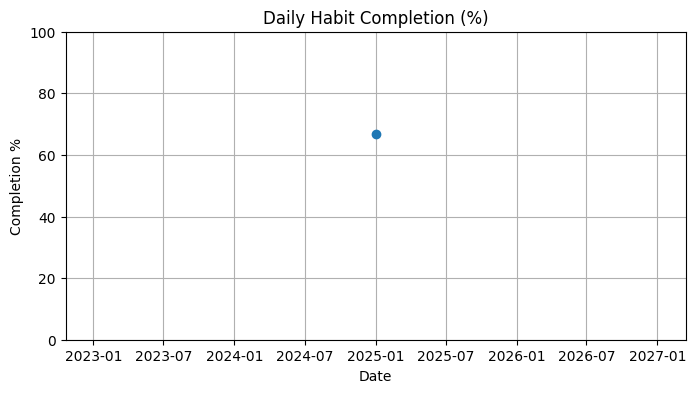

In [3]:
plt.figure(figsize=(8,4))
plt.plot(daily_progress["date"], daily_progress["completion_pct"], marker="o")
plt.title("Daily Habit Completion (%)")
plt.xlabel("Date")
plt.ylabel("Completion %")
plt.ylim(0, 100)
plt.grid(True)
plt.show()

In [4]:
habit_progress = (
    df.groupby("habit_name")["completed"]
      .mean()
      .reset_index()
)

habit_progress["completion_pct"] = habit_progress["completed"] * 100

/tmp/ipykernel_16780/864781905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


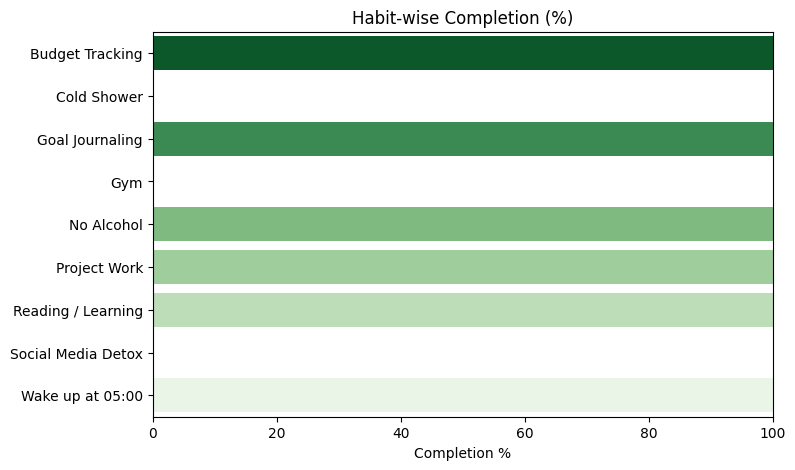

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=habit_progress,
    x="completion_pct",
    y="habit_name",
    palette="Greens_r"
)

plt.title("Habit-wise Completion (%)")
plt.xlabel("Completion %")
plt.ylabel("")
plt.xlim(0,100)
plt.show()

In [6]:
df["week"] = df["date"].dt.isocalendar().week


In [7]:
weekly_progress = (
    df.groupby("week")["completed"]
      .mean()
      .reset_index()
)

weekly_progress["completion_pct"] = weekly_progress["completed"] * 100
weekly_progress

,week,completed,completion_pct
0,1,0.666667,66.666667


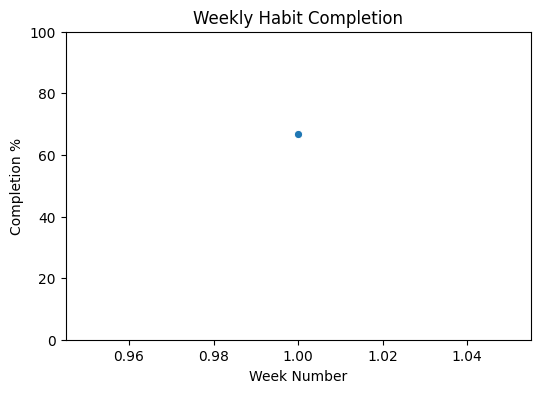

In [8]:
plt.figure(figsize=(6,4))
sns.lineplot(
    data=weekly_progress,
    x="week",
    y="completion_pct",
    marker="o"
)

plt.title("Weekly Habit Completion")
plt.xlabel("Week Number")
plt.ylabel("Completion %")
plt.ylim(0,100)
plt.show()

In [9]:
overall_pct = df["completed"].mean() * 100
overall_pct

np.float64(66.66666666666666)

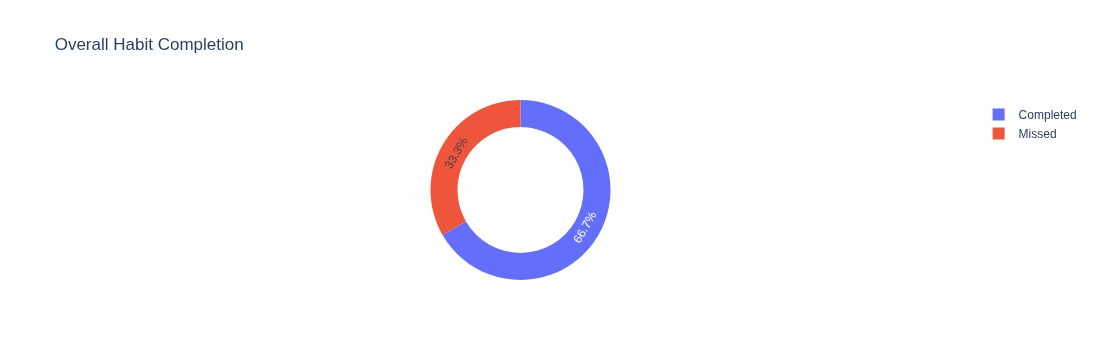

In [10]:
fig = px.pie(
    names=["Completed", "Missed"],
    values=[overall_pct, 100 - overall_pct],
    hole=0.7,
    title="Overall Habit Completion"
)

fig.show()

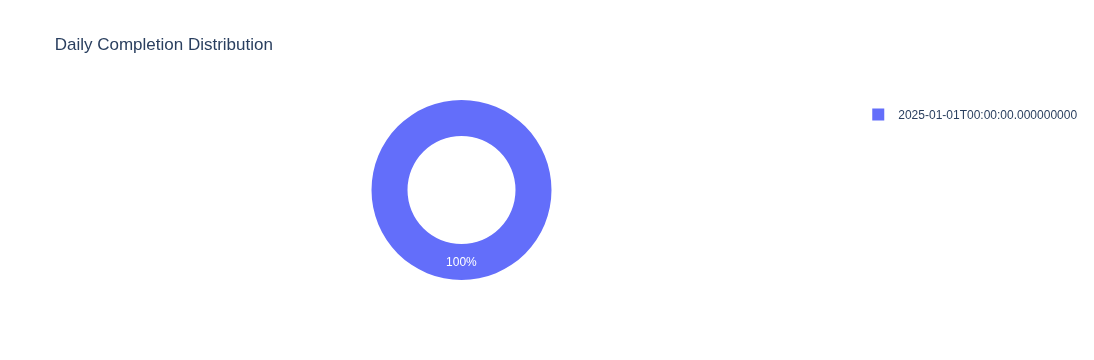

In [11]:
fig = px.pie(
    daily_progress,
    names="date",
    values="completion_pct",
    hole=0.6,
    title="Daily Completion Distribution"
)
fig.show()

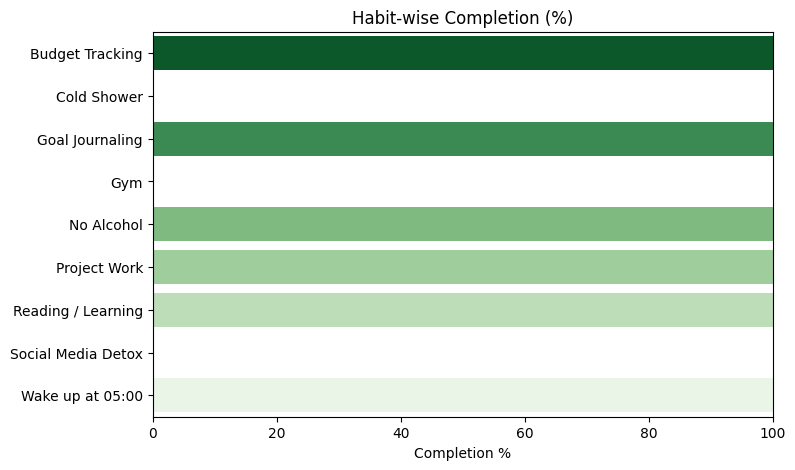

In [12]:
plt.figure(figsize=(8,5))

sns.barplot(
    data=habit_progress,
    x="completion_pct",
    y="habit_name",
    hue="habit_name",
    palette="Greens_r",
    legend=False
)

plt.title("Habit-wise Completion (%)")
plt.xlabel("Completion %")
plt.ylabel("")
plt.xlim(0,100)
plt.show()

In [13]:
habit_progress = habit_progress.sort_values("completion_pct", ascending=False)
